# Проект: Исследование эффективности рекламных кампаний в приложении Procrastinate Pro+

**Описание проекта**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Цель проекта**

Разобраться в причинах убытков приложения Procrastinate Pro+ и помочь компании выйти в плюс.

**Ход исследования**

- Определить откуда приходят пользователи и какими устройствами они пользуются,
- Посчитать сколько стоит привлечение пользователей из различных рекламных каналов;
- Посчитать сколько денег приносит каждый клиент,
- Определить когда расходы на привлечение клиента окупаются,
- Определить какие факторы мешают привлечению клиентов.

**Описание данных**

Структура `visits_info_short.csv`:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:

- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:

- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Ознакомление с данными и подготовка к анализу

### Загрузим и изучим данные

In [ ]:
# Импоритруем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [ ]:
# Загружаем данные
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
        pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
        pd.read_csv('/datasets/costs_info_short.csv'),  # расходы на рекламу
    )

except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),  # журнал сессий
        pd.read_csv('orders_info_short.csv'),  # заказы
        pd.read_csv('costs_info_short.csv'),  # расходы на рекламу
    )

In [ ]:
# Выведем основную информацию о датафреймах
def df_summary(dfs):
    for i, df in enumerate(dfs):
        print(f"\n--- DataFrame {i + 1} ---\n")
        print("Первые 5 строк:")
        display(df.head())
        print("\nИнформация о столбцах:")
        df.info()
        print("\nОписательная статистика:")
        print(df.describe())

        print("\nЧастоты значений для каждого столбца:")
        for col in df.columns:
            if df[col].dtype == 'object' or df[col].nunique() < 20:
                print(f"\nСтолбец: {col}")
                print(df[col].value_counts())

df_summary([visits, orders, costs])


--- DataFrame 1 ---

Первые 5 строк:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Описательная статистика:
            User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

Частоты значений для каждого столбца:

Столбец: Region
United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

Столбец: Device
iPhone     112603
Android     72590
PC          62686
Mac    

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Описательная статистика:
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

Частоты значений для каждого столбца:

Столбец: Event Dt
2019-09-14 23:35:11    2
2019-10-26 17:53:08    2
2019-10-11 20:55:22    2
2019-10-07 09:33:30    2
2019-10-25 16:24:24    2
                      ..
2019-06-24 09:00:25    1
2019-07-25 05:00:12    1
2019-08-19 15:40:30

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Описательная статистика:
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

Частоты значений для каждого столбца:

Столбец: dt
2019-07-09    10
2019-05-05    10
2019-07-19    10
2019-10-02    10
2019-10-25    10
              ..
2019-09-10    10
2019-06-07    10
2019-06-18    10
2019-07-02    10
2019-09-12    10
Name: dt, Length: 180, dtype: int64

Столбец: Channel
LeapBob               180
MediaTornado          180
OppleCreativeMedia    180
lambdaMediaAds        180
WahooNetBanner        180
RocketS

**Вывод:**<br/>
- Датафрейм `visits` состоит из 309901 записей и 6 столбцов.
- Датафрейм `orders` состоит из 40212 записей и 3 столбцов.
- Датафрейм `costs` состоит из 1800 записей и 3 столбцов.
- Названия столбцов не соответствуют стилю написания `snake_case` и не преведены к нижнему регистру.
- Тип данных для столбцов с датой и временем не соответствует `datetime`.

### Подготовка данных

In [ ]:
# Приведём все имена столбцов к нижнему регистру и уберём пробелы
for df in [visits, orders, costs]:
    df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [ ]:
# Проверим датафреймы на пропуски
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

In [ ]:
# Проверим датафреймы на наличие дубликатов
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

In [ ]:
# Изменим типы данных столбцов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [ ]:
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

**Вывод:**<br/>
- Названия столбцов в датафреймах были приведены к нижнему регистру и стилю написания `snake_case`.
- Столбцы приведены к типу данных согласно их наполнению `datetime`.
- В столбцах не выявлено пропусков или дубликатов.

## Разработка функций для анализа

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### get_profiles()

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### get_retention()

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_conversion()

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_ltv()

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### filter_data()

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### plot_retention()

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

### plot_conversion()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### plot_ltv_roi()

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### aggregate()

In [ ]:
# Функция для группировки и аггрегации данных

def aggregate(df, column):
    return (
        df
        .groupby(column)
        .agg({'user_id': 'count', 'payer': 'sum'})
        .sort_values(by='user_id', ascending=False)
    )

**Вывод по разделу:**<br/>
Заданы все необходимы для анализа функции:
 - `get_profiles()` — для создания профилей пользователей,
 - `get_retention()` — для подсчёта Retention Rate,
 - `get_conversion()` — для подсчёта конверсии,
 - `get_ltv()` — для подсчёта LTV.
 - `filter_data()` — для сглаживания данных,
 - `plot_retention()` — для построения графика Retention Rate,
 - `plot_conversion()` — для построения графика конверсии,
 - `plot_ltv_roi` — для визуализации LTV и ROI.
 - `aggregate()` — для группировки и аггрегации данных.

## Исследовательский анализ данных

### Профили пользователей: минимальная и максимальная даты привлечения

In [ ]:
# Получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [ ]:
# Определим минимальную и максимальную дату привлечения пользователей
print(f"Минимальная дата привлечения клиентов: {profiles['dt'].min()}")
print(f"Максимальная дата привлечения клиентов: {profiles['dt'].max()}")

Минимальная дата привлечения клиентов: 2019-05-01
Максимальная дата привлечения клиентов: 2019-10-27


**Вывод:**<br/>
На основе данных из трех датафреймов были успешно составлены профили пользователей. Также определены минимальная и максимальная даты их привлечения. Период соответствует заявленному в предоставленых данных.

### Анализ географии пользователей: распределение и доля платящих клиентов по странам

In [ ]:
# Сгруппируем пользователей по стране
country_payment = aggregate(profiles, 'region')

country_payment

,user_id,payer
region,,
United States,100002,6902
UK,17575,700
France,17450,663
Germany,14981,616


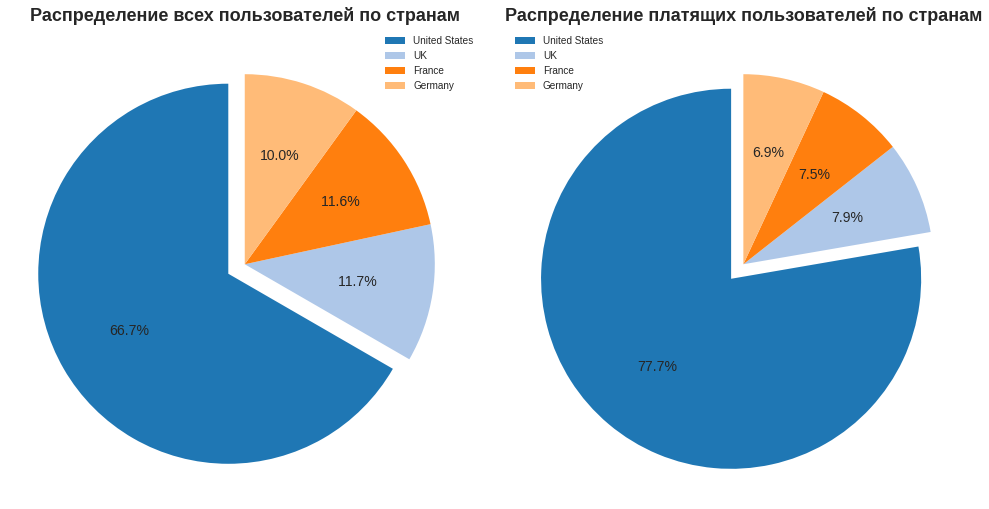

In [ ]:
# Построим две круговые диаграммы
plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

colors = plt.cm.tab20.colors

# Доля всех пользователей по странам
explode = [0.1 if i == 0 else 0 for i in range(len(country_payment))]  # выделение первого сегмента
ax1.pie(
    country_payment['user_id'],
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 14}
)
ax1.set_title('Распределение всех пользователей по странам', fontsize=18, fontweight='bold')
ax1.legend(country_payment.index, loc="best")

# Доля платящих пользователей по странам
ax2.pie(
    country_payment['payer'],
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 14}
)
ax2.set_title('Распределение платящих пользователей по странам', fontsize=18, fontweight='bold')
ax2.legend(country_payment.index, loc="best")

plt.tight_layout()

plt.show()

In [ ]:
# Посчитаем процент платящих пользователей от всех пользователей по каждой стране
country_payment['payer_perc'] = round(
    (country_payment['payer'] / country_payment['user_id']) * 100, 1
)

country_payment.sort_values(by='payer_perc', ascending=False)

,user_id,payer,payer_perc
region,,,
United States,100002,6902,6.9
Germany,14981,616,4.1
UK,17575,700,4.0
France,17450,663,3.8


**Вывод:**<br/>
Приложение привлекает большинство своих пользователей из США, на долю которых приходится 66,7% от общего числа пользователей. Остальные страны — Франция, Германия и Великобритания — представлены примерно равномерно, с долями 11,6%, 10% и 11,7% соответственно. По количеству платящих пользователей также лидирует США, обеспечивая 77,7% всех платежей. Однако, если рассматривать долю платящих пользователей внутри каждой страны, то ситуация выглядит менее оптимистично: платят только 3,8-6,9% пользователей. Самый высокий процент платящих — в США (6,9%), тогда как во Франции он самый низкий (3,8%).

### Анализ устройств: доля устройств пользователей и платящих клиентов

In [ ]:
# Сгруппируем пользователей по используемым устройствам
device_payment = aggregate(profiles, 'device')

device_payment

,user_id,payer
device,,
iPhone,54479,3382
Android,35032,2050
PC,30455,1537
Mac,30042,1912


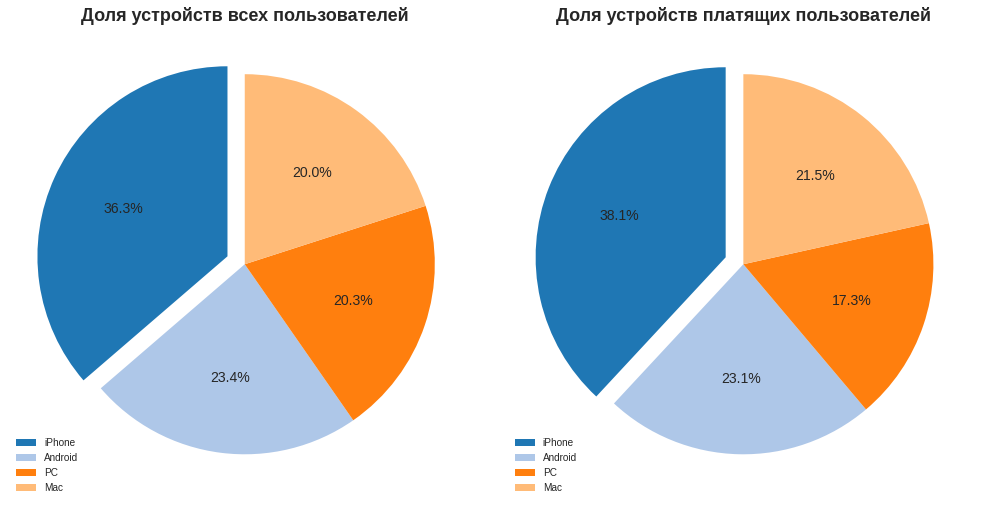

In [ ]:
# Построим две круговые диаграммы
plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

colors = plt.cm.tab20.colors

# Доля устройств всех пользователей
explode = [0.1 if i == 0 else 0 for i in range(len(device_payment))]
ax1.pie(
    device_payment['user_id'],
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 14}
)
ax1.set_title('Доля устройств всех пользователей', fontsize=18, fontweight='bold')
ax1.legend(device_payment.index, loc="best")

# Доля устройств платящих пользователей
ax2.pie(
    device_payment['payer'],
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 14}
)
ax2.set_title('Доля устройств платящих пользователей', fontsize=18, fontweight='bold')
ax2.legend(device_payment.index, loc="best")

plt.tight_layout()

plt.show()

In [ ]:
# Посчитаем процент платящих пользователей от всех пользователей в разрезе устройств
device_payment['payer_perc'] = round(
    (device_payment['payer'] / device_payment['user_id']) * 100, 1
)

device_payment.sort_values(by='payer_perc', ascending=False)

,user_id,payer,payer_perc
device,,,
Mac,30042,1912,6.4
iPhone,54479,3382,6.2
Android,35032,2050,5.9
PC,30455,1537,5.0


**Вывод:**<br/>
Устройства от компании Apple занимают лидирующие позиции среди платящих пользователей. Наибольший процент платящих клиентов используют Mac (6,4%) и iPhone (6,2%), что подтверждает их популярность среди платящей аудитории. В то же время устройства на базе Android и PC демонстрируют более низкие показатели, с наименьшей долей платящих пользователей у PC (5%). По общему количеству пользователей iPhone занимает первое место с (36,3%), за ним следуют Android (23,4%), PC (20,3%) и Mac (20%). Среди платящих пользователей — первое место так-же у iPhone (38,1%), затем идут Android (23,1%), MAC (21,5%), PC (17,3%).

### Анализ рекламных источников: каналы привлечения пользователей и платящих клиентов

In [ ]:
# Сгруппируем пользователей по каналам привлечения
channel_payment = aggregate(profiles, 'channel')

channel_payment

,user_id,payer
channel,,
organic,56439,1160
FaceBoom,29144,3557
TipTop,19561,1878
OppleCreativeMedia,8605,233
LeapBob,8553,262
WahooNetBanner,8553,453
RocketSuperAds,4448,352
MediaTornado,4364,156
YRabbit,4312,165


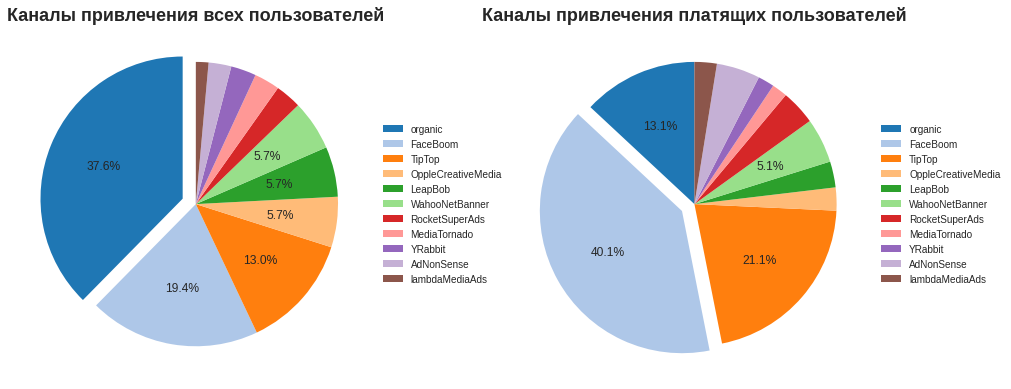

In [ ]:
# Построим две круговые диаграммы
plt.style.use('seaborn')

colors = plt.cm.tab20.colors

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))

# Функция для выделения самого большого сегмента
def get_explode(values):
    max_index = values.idxmax()
    return [0.1 if channel == max_index else 0 for channel in values.index]

# Доля каналов привлечения всех пользователей
explode_user = get_explode(channel_payment['user_id'])
ax1.pie(
    channel_payment['user_id'],
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
    colors=colors,
    explode=explode_user,
    startangle=90,
    textprops={'fontsize': 12}
)
ax1.set_title('Каналы привлечения всех пользователей', fontsize=18, fontweight='bold')
ax1.legend(channel_payment.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))  # Легенда сбоку

# Доля каналов привлечения платящих пользователей
explode_payer = get_explode(channel_payment['payer'])
ax2.pie(
    channel_payment['payer'],
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
    colors=colors,
    explode=explode_payer,
    startangle=90,
    textprops={'fontsize': 12}
)
ax2.set_title('Каналы привлечения платящих пользователей', fontsize=18, fontweight='bold')
ax2.legend(channel_payment.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

plt.show()

In [ ]:
# Посчитаем процент платящих пользователей от всех пользователей по каналу привлечения
channel_payment['payer_perc'] = round(
    (channel_payment['payer'] / channel_payment['user_id']) * 100, 2
)

channel_payment.sort_values(by='payer_perc', ascending=False)

,user_id,payer,payer_perc
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


**Вывод:**<br/>
Среди всех пользователей приложения наибольшую долю составляют "Органические" каналы, которые обеспечивают почти 37% от общего числа. Также значительное количество пользователей привлекли каналы Фэйсбум (19%) и Типтоп (13%).<br/>
Среди платящих пользователей лидируют те, кто пришел из канала Фэйсбум, их доля составляет 40%. На втором месте находятся пользователи, привлеченные через Типтоп, с долей 21%, тогда как "органические" пользователи составляют 13%.<br/>
Если рассматривать процент пользователей, которые стали платящими из числа "неплатящих" по каждому каналу, то наибольшая склонность к покупкам наблюдается у пользователей, пришедших из Фэйсбума, AdNonSense и lammbdaMediaAds, где процент покупок варьируется от 10% до 12%.

## Маркетинг

### Общая сумма расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [ ]:
 print(f'Общая сумма расходов на маркетинг: {costs["costs"].sum().round()}')

Общая сумма расходов на маркетинг: 105497.0


**Вывод:**<br/>
- Общая сумма расходов на маркетинг: 105497.

### Распределение расходов по рекламным источникам

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
# Сгруппируем расходы на рекламу по каналам
channel_cost = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost': 'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
)

channel_cost['%'] = round(
    (channel_cost['acquisition_cost'] / channel_cost['acquisition_cost'].sum()) * 100,
    2
)

channel_cost

,acquisition_cost,%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


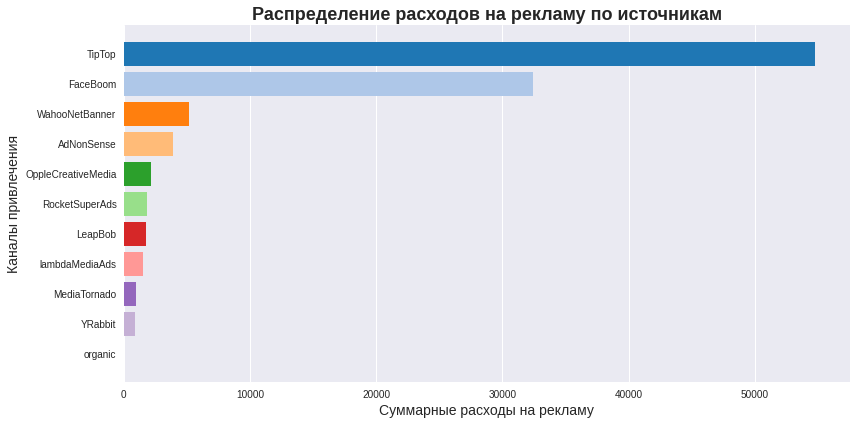

In [ ]:
# Отобразим расходы на рекламу по каналам
plt.style.use('seaborn')

colors = plt.cm.tab20.colors

plt.figure(figsize=(12, 6))

plt.barh(
    channel_cost.index,
    channel_cost['acquisition_cost'],
    color=colors[:len(channel_cost)]
)

plt.xlabel('Суммарные расходы на рекламу', fontsize=14)
plt.ylabel('Каналы привлечения', fontsize=14)
plt.title('Распределение расходов на рекламу по источникам', fontsize=18, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

**Вывод:**<br/>
- Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится более 80% всех затрат.

### Динамика изменения расходов по источникам: недельные и месячные графики

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [ ]:
# Преобразуем тип данных
costs['dt'] = pd.to_datetime(costs['dt'])

# Получаем номера недель и месяцев
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

In [ ]:
# Строим сводную таблицу суммарных расходов на маркетинг по неделям и каналам привлечения
report_week = costs.pivot_table(
    index='channel',
    columns='week',
    values='costs',
    aggfunc='sum'
)

report_week

week,18,19,20,21,22,23,24,25,26,27,...,34,35,36,37,38,39,40,41,42,43
channel,,,,,,,,,,,,,,,,,,,,,
AdNonSense,211.05,273.00,265.65,266.70,202.650,102.90,96.60,141.75,148.05,130.200,...,142.80,133.35,100.800,100.80,139.650,192.15,155.40,136.500,118.650,154.35
FaceBoom,535.70,750.20,755.70,722.70,1208.900,1081.30,1042.80,1280.40,1647.80,1536.700,...,1411.30,1445.40,1151.700,1148.40,1496.000,1837.00,1761.10,1392.600,1291.400,1552.10
LeapBob,16.80,31.71,26.67,26.67,65.520,66.99,52.29,68.46,99.75,87.360,...,90.51,77.91,66.990,63.84,81.270,101.22,101.01,78.960,69.720,84.42
MediaTornado,38.64,61.68,59.04,50.16,36.960,27.60,29.76,32.16,40.56,43.440,...,35.28,33.84,30.240,25.92,30.240,48.24,42.00,36.960,29.040,37.44
OppleCreativeMedia,24.00,34.50,27.50,34.25,81.750,79.50,71.50,79.75,107.00,102.500,...,103.75,92.75,72.750,78.00,105.750,132.25,123.00,88.250,88.000,101.50
RocketSuperAds,99.45,139.23,138.06,131.04,97.695,76.05,63.18,80.73,78.26,75.075,...,40.30,51.35,40.625,40.95,56.225,63.70,66.30,51.675,46.475,50.70
TipTop,347.00,470.00,454.00,801.80,1421.200,1223.60,1121.00,1474.40,2343.60,2340.000,...,2514.00,2583.00,2563.000,2506.00,3241.000,3979.50,3703.00,3097.500,2737.000,3265.50
WahooNetBanner,49.20,92.40,90.00,79.20,179.400,196.80,166.20,201.60,285.00,256.800,...,244.80,235.80,174.600,192.60,226.200,303.00,309.00,208.800,216.000,253.20
YRabbit,52.20,75.90,69.30,65.40,49.800,25.80,17.46,22.14,27.90,28.260,...,30.03,24.36,27.930,29.76,39.600,47.52,45.36,38.310,36.450,48.33


In [ ]:
# Строим сводную таблицу суммарных расходов на маркетинг по месяцам и каналам привлечения
report_month = costs.pivot_table(
    index='channel',
    columns='month',
    values='costs',
    aggfunc='sum'
)

report_month

month,5,6,7,8,9,10
channel,,,,,,
AdNonSense,1169.70,538.650,504.00,579.60,581.70,537.600
FaceBoom,3524.40,5501.100,5294.30,6274.40,6114.90,5736.500
LeapBob,140.28,314.580,313.53,369.81,343.98,315.420
MediaTornado,238.56,138.000,138.48,154.56,144.72,140.160
OppleCreativeMedia,169.75,370.000,366.50,439.25,427.75,378.000
RocketSuperAds,577.98,325.715,252.07,253.11,218.40,205.725
TipTop,2981.00,6675.600,8410.20,11202.00,13232.50,12250.000
WahooNetBanner,418.80,921.000,851.40,1040.40,977.40,942.000
YRabbit,299.70,106.200,97.38,124.74,152.79,163.410


<Figure size 864x432 with 0 Axes>

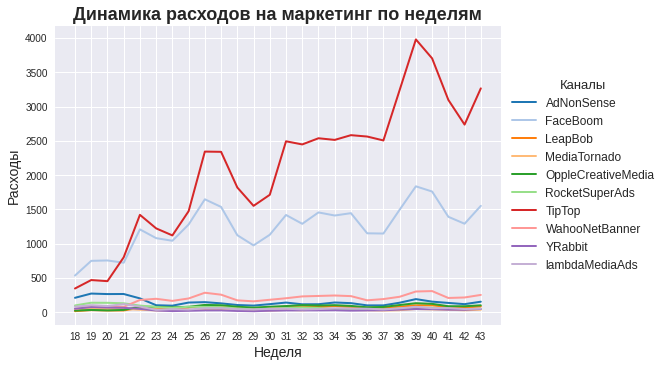

In [ ]:
# График динамики изменения расходов на маркетинг по неделям
plt.style.use('seaborn')

colors = plt.cm.tab20.colors

plt.figure(figsize=(12, 6))

report_week.T.plot(
    grid=True,
    xticks=list(report_week.columns.values),
    color=colors,
    linewidth=2
)
plt.title('Динамика расходов на маркетинг по неделям', fontsize=18, fontweight='bold')
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Расходы', fontsize=14)
plt.legend(title='Каналы', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<Figure size 864x432 with 0 Axes>

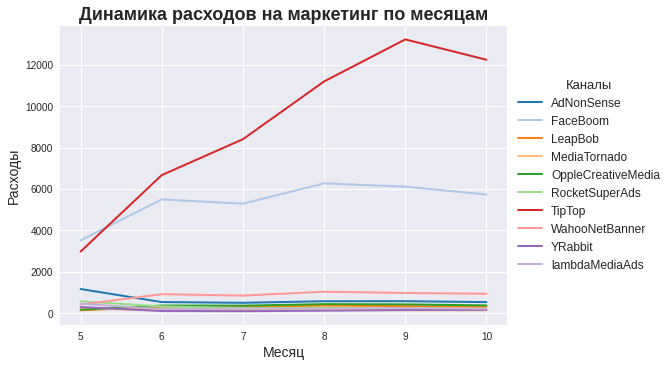

In [ ]:
# График динамики изменения расходов на маркетинг по месяцам
plt.style.use('seaborn')

colors = plt.cm.tab20.colors

plt.figure(figsize=(12, 6))

report_month.T.plot(
    grid=True,
    xticks=list(report_month.columns.values),
    color=colors,
    linewidth=2
)
plt.title('Динамика расходов на маркетинг по месяцам', fontsize=18, fontweight='bold')
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14)
plt.legend(title='Каналы', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Вывод:**<br/>
Основные рекламные бюджеты направлялись на `TipTop` и `FaceBoom`, с еженедельным и ежемесячным ростом расходов. Если в мае на `TipTop` тратили 2.9 тыс., то к сентябрю сумма увеличилась до 13 тыс. В аналогичный период расходы на `FaceBoom` возросли с 3.5 тыс. до 6.1 тыс. Расходы на другие источники были значительно ниже.

### Стоимость привлечения одного пользователя

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [ ]:
# Рассчитаем САС для каждого источника трафика
cac_channel = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .reset_index()
)

cac_channel

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


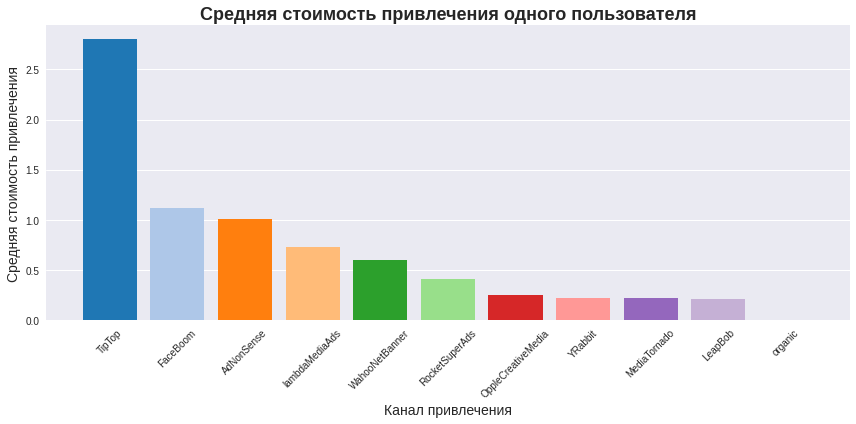

In [ ]:
# Отобразим среднюю стоимость привлечения одного пользователя
plt.style.use('seaborn')

colors = plt.cm.tab20.colors

plt.figure(figsize=(12, 6))

plt.bar(
    cac_channel['channel'],
    cac_channel['acquisition_cost'],
    color=colors[:len(cac_channel)]
)

plt.xlabel('Канал привлечения', fontsize=14)
plt.ylabel('Средняя стоимость привлечения', fontsize=14)
plt.title('Средняя стоимость привлечения одного пользователя', fontsize=18, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Вывод:**<br/>
Привлечение пользователей через канал `TipTop` является самым дорогим для приложения, с средней стоимостью 2.80 за пользователя. Следом идут `FaceBoom` и `AdNonSense`, где привлечение стоит примерно 1.11 и 1 соответственно. Органический трафик остается бесплатным, а остальные каналы требуют затрат от 0.21 до 0.72. Примечательно, что половина бюджета на рекламу уходит на `TipTop`, что может указывать на неоправданно высокие расходы на этот канал.

## Окупаемость рекламы

### Анализ окупаемости рекламы: LTV, CAC и ROI

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Зададим момент и горизонт анализа. Исключим органическиз пользователей.

In [ ]:
# Зададим момент анализа
observation_date = profiles['dt'].max()

# Зададим горизонт анализа
horizon = 14

# Исключим всех органическсих пользователей
profiles = profiles.query('channel != "organic"')

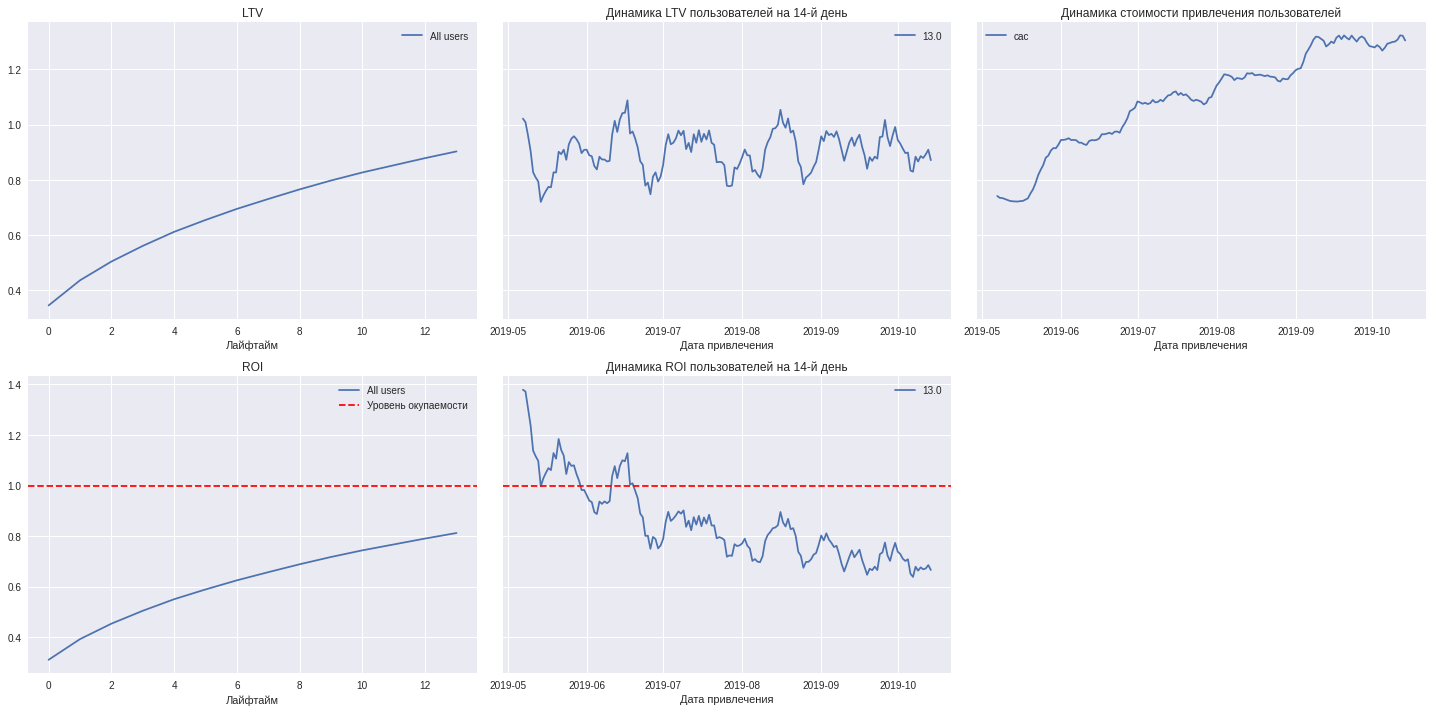

In [ ]:
# Посчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon
)

# Построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

**Вывод:**<br/>
- Показатель `LTV` стабильно растёт, что свидетельствует о том, что прибыль с каждого клиента увеличивается на протяжении всего жизненного цикла.
- `ROI` падает и к концу второй недели составляет лишь около 80%, что означает, что реклама не окупается.
- С мая наблюдается резкий спад ROI, и к концу анализируемого периода он опустился ниже **0.6**.
- `CAC` стабильно увеличивается, начиная с мая, что оказывает негативное влияние на общие показатели окупаемости.
- Затраты на рекламу растут быстрее, чем прибыль от привлеченных клиентов.

Несмотря на стабильный рост `LTV`, уменьшение `ROI` указывает на то, что затраты на рекламу растут быстрее, чем прибыль от привлеченных клиентов.

### Конверсия и удержание пользователей

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

In [ ]:
# Посчитаем конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon
)

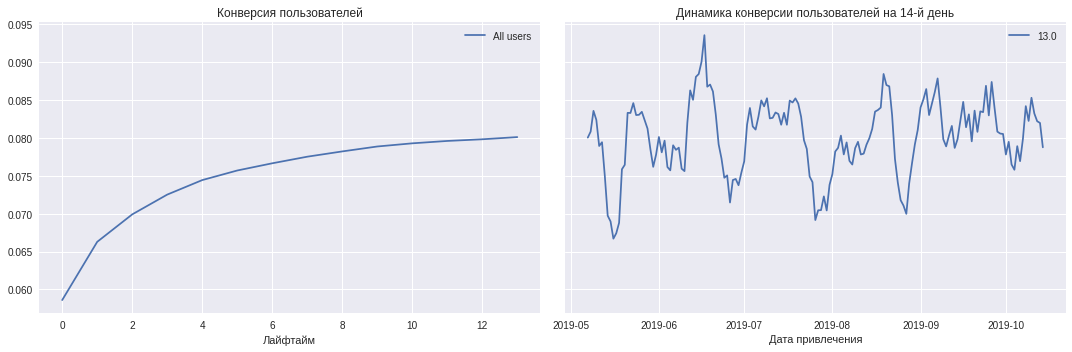

In [ ]:
# Построим график для визуализации конверсии
plot_conversion(conversion_grouped, conversion_history, horizon)

In [ ]:
# Посчитаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon
)

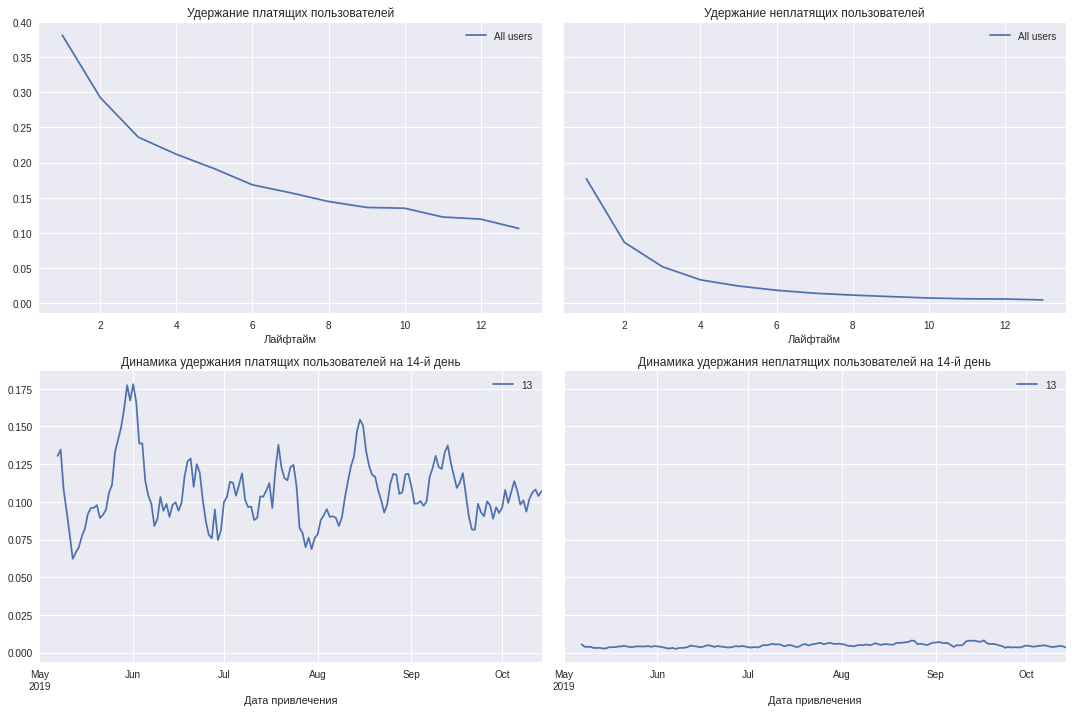

In [ ]:
# Построим график для визуализации удержания
plot_retention(retention_grouped, retention_history, horizon)

**Вывод:**<br/>
- Конверсия стабильно растёт со временем, начиная с 0.06 и достигая примерно 0.08, однако темпы роста замедляются к началу второй недели. Динамика конверсии на 14-й день характеризуется колебаниями в разные периоды и значительных отличий между периодами не наблюдается.
- К концу первой недели показатель удержания платящих пользователей находится на уровне 15%, к концу второй недели в приложении остаются порядка 10% платящих пользователей. Удержание неплатящих пользователей значительно ниже и находится на уровне около 3-5% уже к концу первой недели.

### Окупаемость рекламы с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

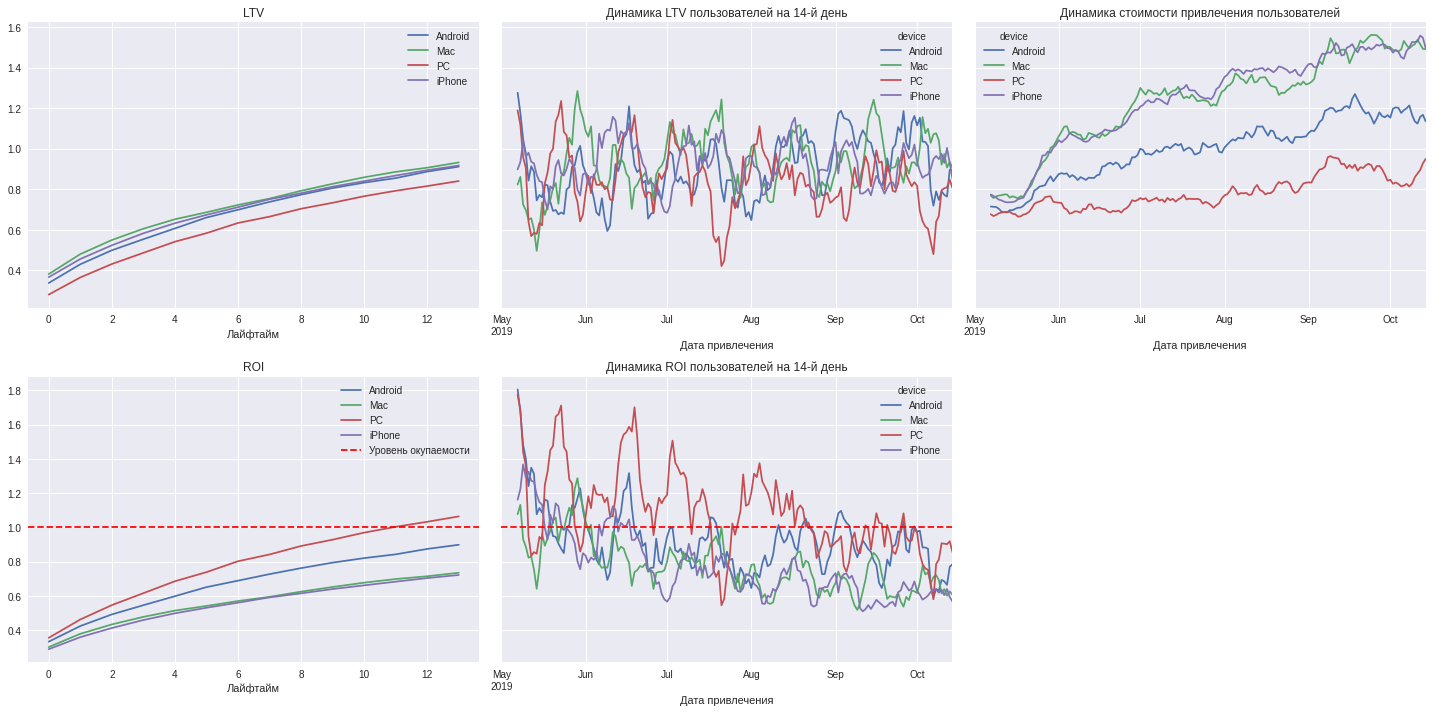

In [ ]:
# Посчитаем LTV и ROI с разбивкой по устройствам
dimensions=['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=dimensions
)

# Построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

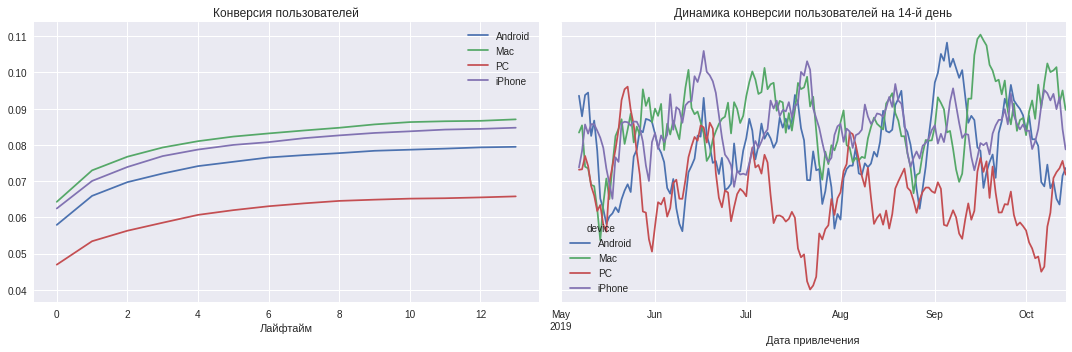

In [ ]:
# Посчитаем конверсию с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=dimensions
)

# Построим график для визуализации конверсии
plot_conversion(conversion_grouped, conversion_history, horizon)

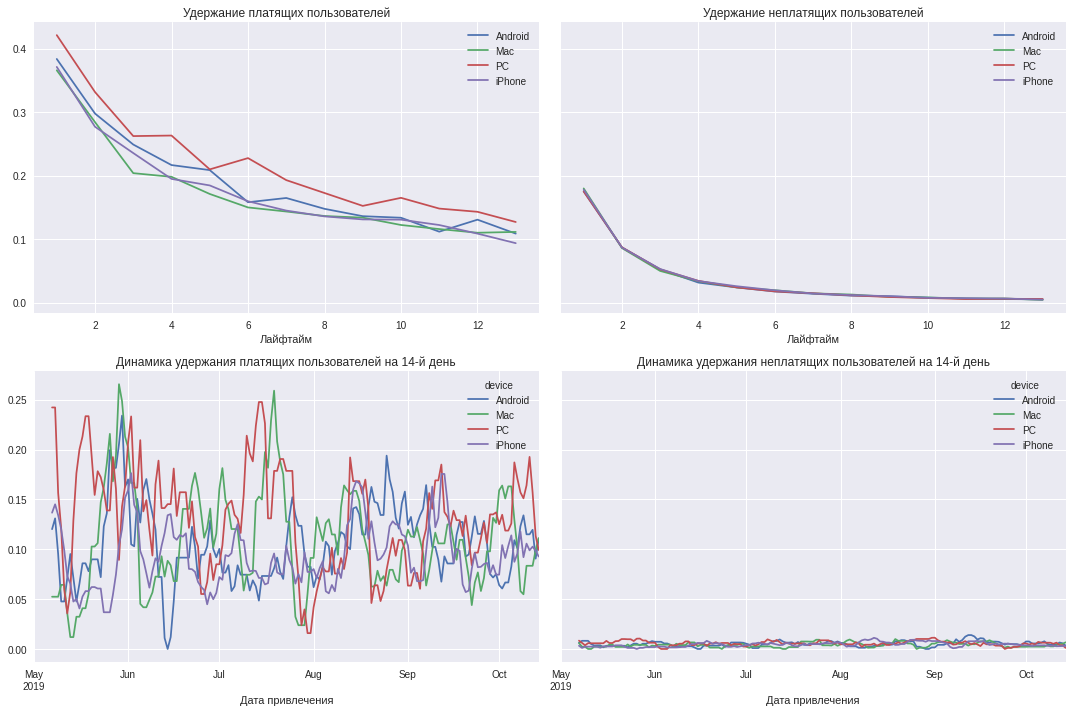

In [ ]:
# Посчитаем удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon,
    dimensions=dimensions
)

# Построим график для визуализации удержания
plot_retention(retention_grouped, retention_history, horizon)

**Вывод:**<br/>
- Показатель `LTV` для всех устройств стабильно растёт. Ниже всех показатель `LTV` у пользователей **PC**. При этом cтоимость привлечения пользователей **PC** самая низкая, а `ROI` - наоборот, выше остальных. Начиная с августа затраты на все устройства перестают окупаться и `ROI` опускается ниже уровня окупаемости.
- В платящих пользователей лучше всех конвертируются владельцы устройств на **Mac**, **iPhone** и **Android**. Хуже всех владельцы **PC**.
- Лучше всего удерживаются пользователи **PC**, хуже - владельцы **iPhone** и **Mac**.

### Окупаемость рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

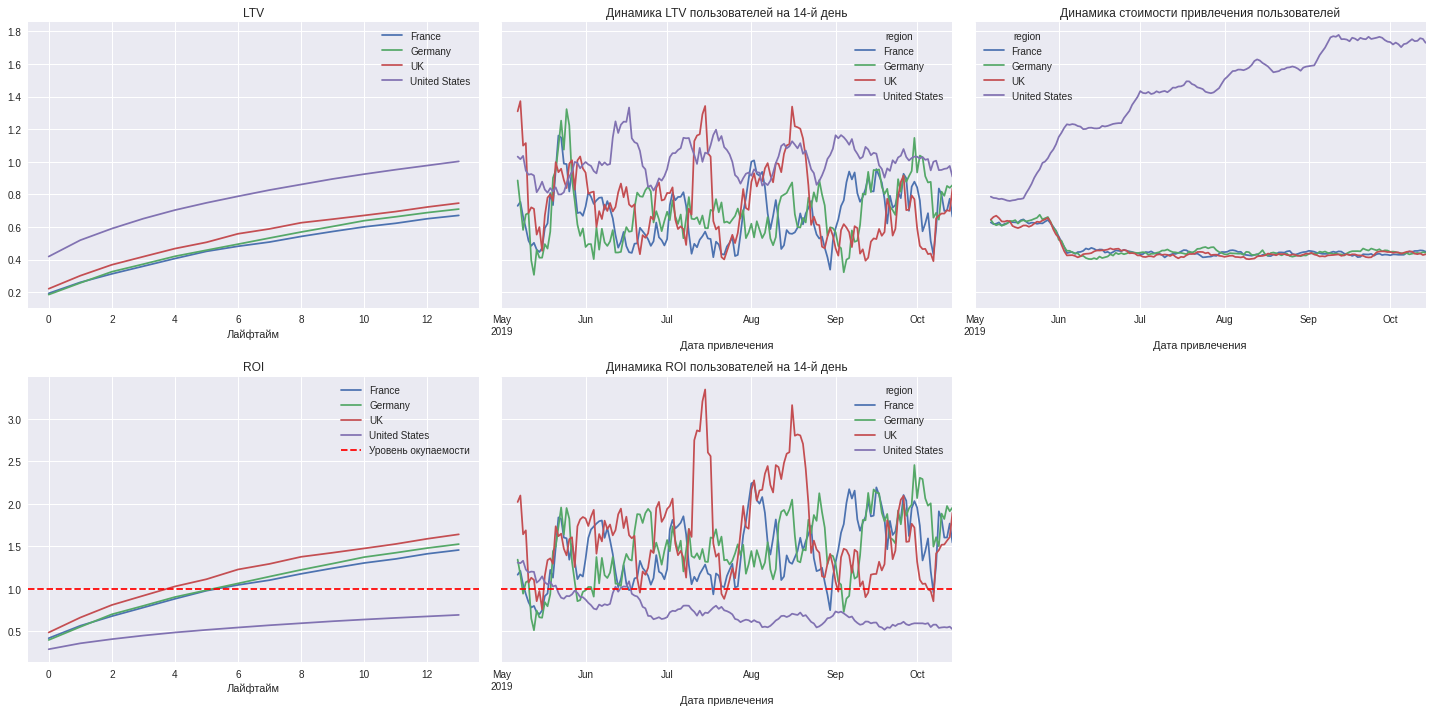

In [ ]:
# Посчитаем LTV и ROI с разбивкой по странам
dimensions=['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=dimensions
)

# Построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

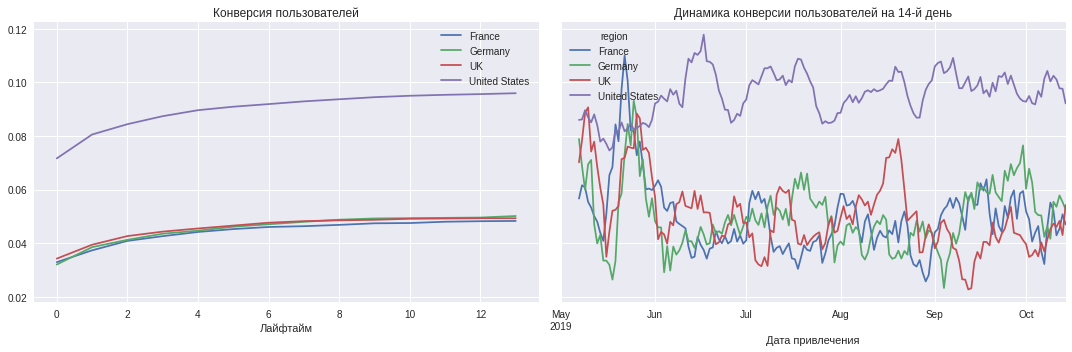

In [ ]:
# Посчитаем конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=dimensions
)

# Построим график для визуализации конверсии
plot_conversion(conversion_grouped, conversion_history, horizon)

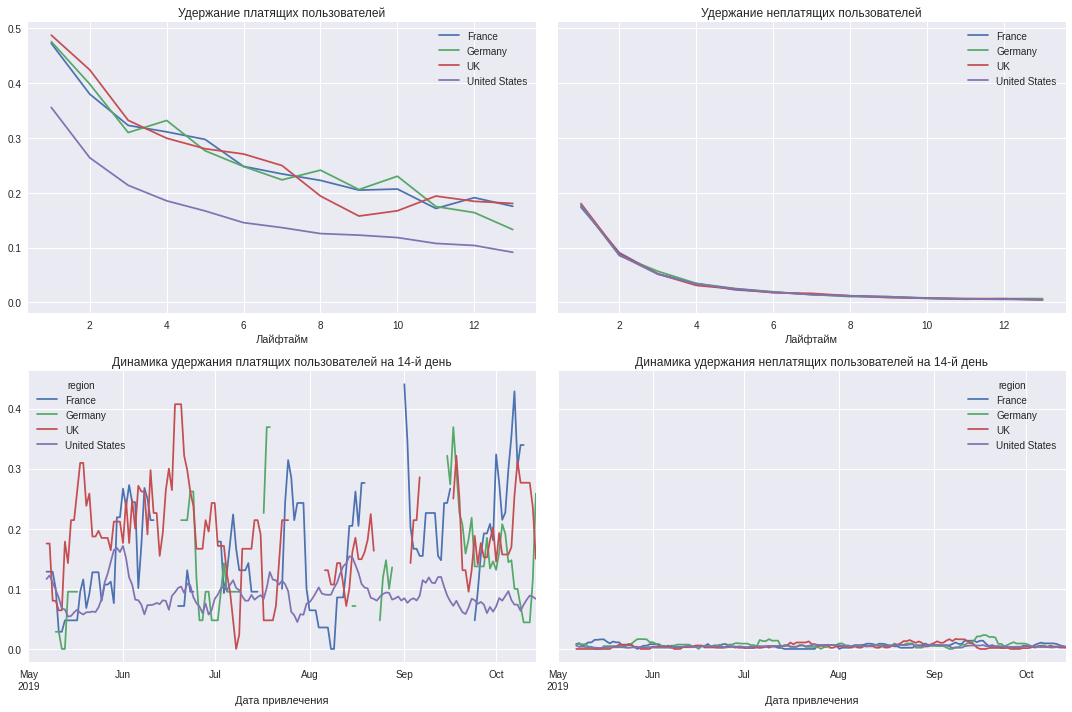

In [ ]:
# Посчитаем удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon,
    dimensions=dimensions
)

# Построим график для визуализации удержания
plot_retention(retention_grouped, retention_history, horizon)

**Вывод:**<br/>
Согласно графикам, пользователи из **США** демонстрируют наиболее высокие значения `LTV`, что означает, что они приносят больше прибыли в долгосрочной перспективе по сравнению с пользователями из других стран. Однако, несмотря на высокий LTV, `ROI` для пользователей из **США** ниже, чем у других стран. Это объясняется тем, что стоимость привлечения пользователей `CAC` начинает стремительно расти с июня, что ведет к снижению окупаемости. Лучше всех окупаются Великобритания, затем идут Германия и Франция.<br/>
Сильная конверсия у пользователей из **США**. При этом пользователи из США удерживаются плохо.

### Окупаемость рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

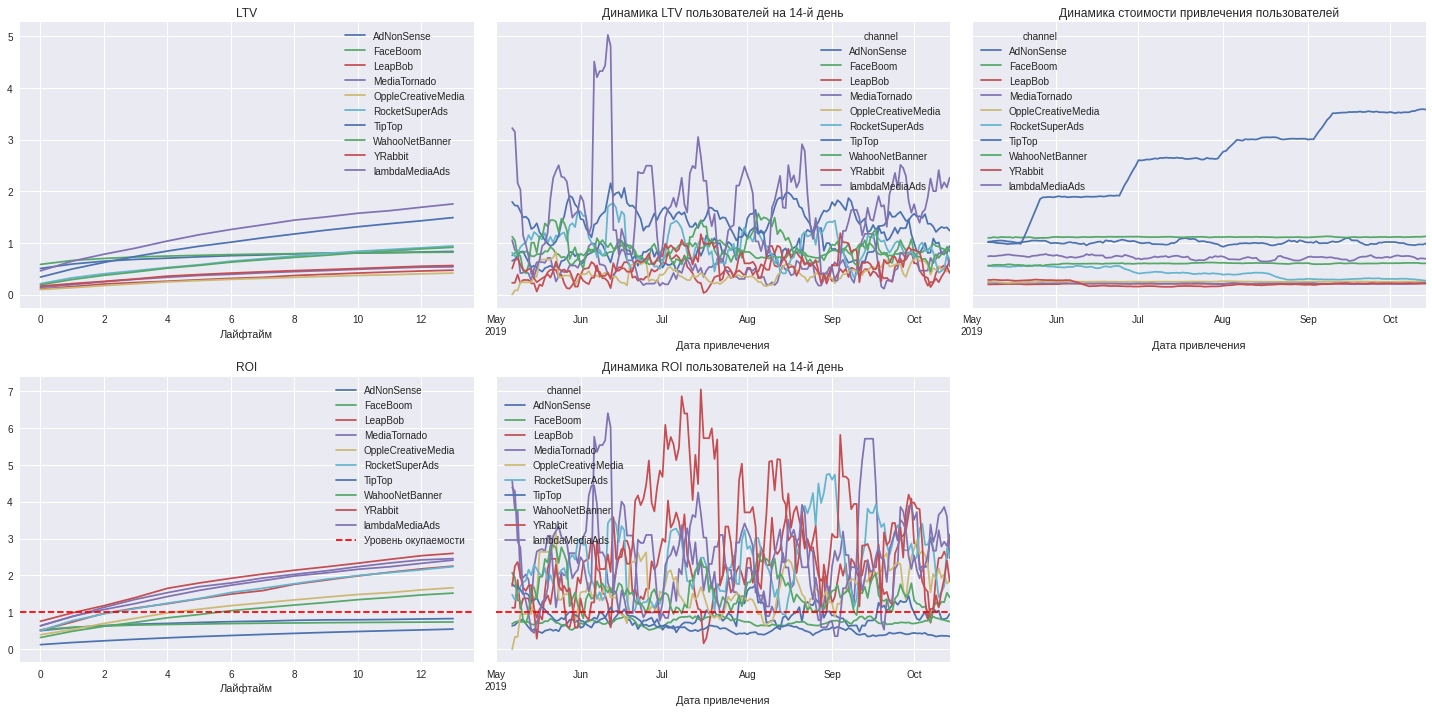

In [ ]:
# Посчитаем LTV и ROI с разбивкой по рекламным каналам
dimensions=['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=dimensions
)

# Построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

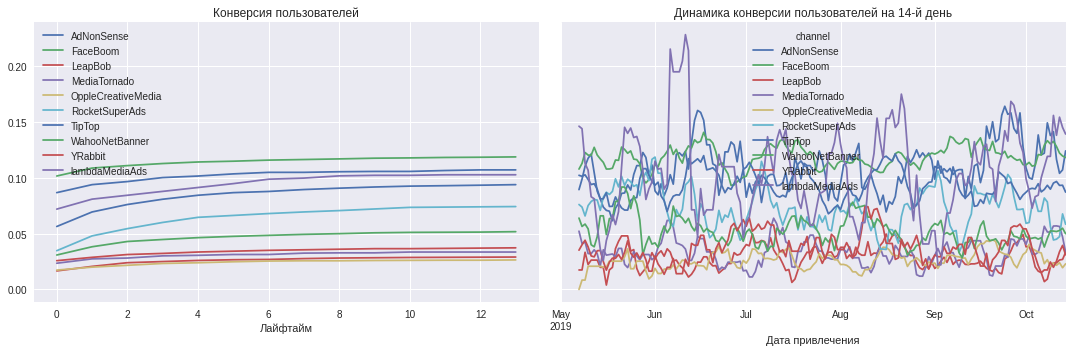

In [ ]:
# Посчитаем конверсию с разбивкой по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=dimensions
)

# Построим график для визуализации конверсии
plot_conversion(conversion_grouped, conversion_history, horizon)

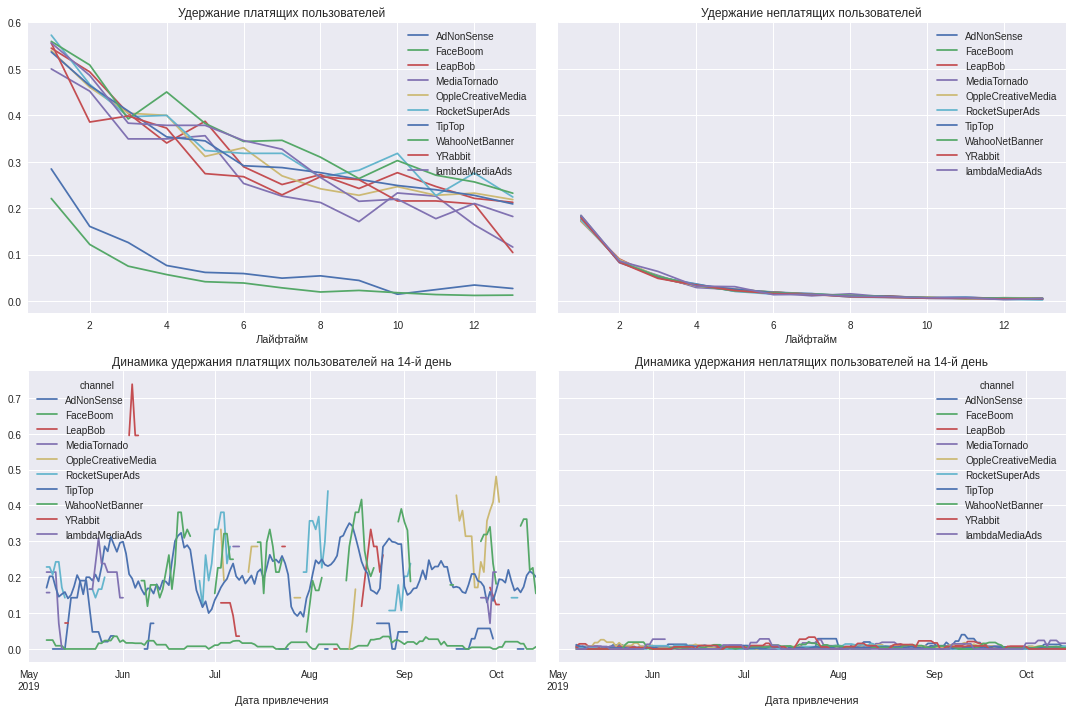

In [ ]:
# Посчитаем удержание с разбивкой по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon,
    dimensions=dimensions
)

# Построим график для визуализации удержания
plot_retention(retention_grouped, retention_history, horizon)

**Вывод:**<br/>
- Стремительный рост затрат на привлечение замечен за пользователями из рекламного канала `TipTop`, при этом, судя по показателям `ROI` затратф не окупились. Так же не окупаются пользователи привлеченные через `FaceBoom` и `AdNonSense`.
- Выше всего конверсия у пользователей, привлеченных посредством `FaceBoom`.

**Вывод по разделу:**<br/>
- Реклама, направленная на привлечение пользователей — **не окупается**. Два крупнейших рекламных канала — `TipTop` и `FaceBoom` — показали плохие результаты, несмотря на большие вложения.
- Наименьший показатель окупаемости наблюдается у пользователей с `iPhone` и `Mac`. Это может быть связано с техническими проблемами совместимости.
- **США** — основной рынок, но несмотря на высокий `LTV`, окупаемость пользователей из США низкая из-за резко растущей стоимости привлечения.

## Общий вывод

Для проведения анализа компания-заказчик предоставила данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Цель проекта: Разобраться в причинах убытков приложения Procrastinate Pro+ и помочь компании выйти в плюс.

В ходе исследования были пройдены следующие шаги:<br/>

1. **Ознакомление с данными**

- Приведены названия столбцов к формату snake_case, типы данных — к соответствующим форматам.
- Пропусков и дубликатов в данных не обнаружено.

2. Разработка функций для анализа

- Разработаны функции для создания пользовательских профилей, расчёта Retention Rate, конверсии, LTV, фильтрации данных и визуализации ключевых показателей (Retention Rate, конверсия, LTV, ROI).

3. **Исследовательский анализ данных**

- Большинство пользователей привлечено из США (66,7%), а платящих — 77,7%. При этом доля платящих пользователей варьируется от 3,8% (Франция) до 6,9% (США).
- Среди устройств лидируют Apple: Mac (6,4% платящих) и iPhone (6,2%). Наименьшая доля у PC (5%).
- Основные каналы привлечения — "органические" (37%), FaceBoom (19%) и TipTop (13%). FaceBoom лидирует среди платящих пользователей (40%). Самая высокая конверсия — у FaceBoom, AdNonSense и lambdaMediaAds (10-12%).

4. **Маркетинг**

- Расходы на маркетинг составили 105497 у.е, наибольшие вложения — в TipTop и FaceBoom (80% бюджета).
- Привлечение через TipTop — самое дорогое (2,80 у.е. на пользователя), следом идут FaceBoom (1,11 у.е.) и AdNonSense (1 у.е.).

5. **Окупаемость рекламы**

- Несмотря на рост LTV, снижение ROI связано с ростом затрат на рекламу, превышающим доходы.
- Конверсия растёт с 0,06 до 0,08, но замедляется после второй недели. Удержание платящих пользователей составляет 15% к концу первой недели, а неплатящих — всего 3-5%.
- LTV пользователей на PC ниже, но ROI выше благодаря низким затратам на привлечение.
- Пользователи из США показывают высокий LTV, но низкий ROI из-за роста затрат на привлечение с июня.
- Наиболее прибыльные каналы — lambdaMediaAds и TipTop, однако TipTop, FaceBoom и AdNonSense не окупаются из-за высоких затрат на привлечение.

**Причины неэффективности привлечения пользователей:**

- Привлечение через каналы `TipTop` и `FaceBoom` оказывается наиболее затратным. В то же время эти каналы потребляют более 80% рекламного бюджета.
- Конверсия пользователей, особенно на крупных рекламных каналах, хоть и растёт со временем, остаётся низкой — в пределах 6-8% к концу первой недели. Это не покрывает затраты на привлечение.
- В некоторых странах, например, во Франции, доля платящих пользователей не превышает 3,8%, что также снижает эффективность маркетинговых кампаний.

**Рекомендации для отдела маркетинга:**

- Провести тестирование других рекламных каналов с меньшей стоимостью привлечения или инвестировать в каналы с высокой конверсией.
- Фокусироваться на органических каналах, которые уже привлекают значительное количество пользователей (37%) и не требуют рекламных затрат.
- Обратить внимание на владельцев ПК, т.к. они единственные, кто окупаются к концу второй недели.
- Уменьшить затраты на маркетинг в США